# NLP Project | 2023W 136010-1 Introduction to DH Tools and Methods 
## Virginia Woolf and her essay "A Room of One´s Own" (1929)

### First Steps

In [172]:
# Importing libraries

import re
import pandas as pd
import os
import time
import codecs
import string
import re
from collections import Counter
from collections import defaultdict

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import Image
%matplotlib inline


import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sophiehamann/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sophiehamann/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [173]:
# Reading the text

with open('/Users/sophiehamann/Documents/GitHub/woolf_text_analysis/woolf.txt', 'r') as file:
    text_woolf = file.read()

In [281]:
#reading the first lines of the text file and getting familiar with the data
with open('woolf.txt', "r") as f:
    lines=f.readlines()[:10]

lines

['ONE\n',
 '\n',
 '\n',
 '\n',
 'But, you may say, we asked you to speak about women and fiction--what,\n',
 "has that got to do with a room of one's own? I will try to explain. When\n",
 'you asked me to speak about women and fiction I sat down on the banks of\n',
 'a river and began to wonder what the words meant. They might mean simply\n',
 'a few remarks about Fanny Burney; a few more about Jane Austen; a\n',
 'tribute to the Brontės and a sketch of Haworth Parsonage under snow;\n']

### Text Processing
Tokenizing the text to perform cleaning

In [175]:
tokens = word_tokenize(text_woolf)

In [176]:
# Removing punctuation and convert to lowercase
cleaned_tokens = [word.lower() for word in tokens if word.isalpha()]

# Removing stopwords
stop_words = set(stopwords.words('english'))

    # Extending the stopwords as there are more which are important to remove in the corpus
    # Generating a list with more stopwords I would like to delete
stopwords_extended = ["may", "would", "could", "even", "might", "shall", "'"]

    # Incorporating this list into the already existing stop words set
stop_words.update(stopwords_extended)

    # Filtering the tokens and hence removing the stopwords
tokens_woolf = [word for word in cleaned_tokens if word not in stop_words]

# Print the cleaned tokens
print(tokens_woolf[:100])

# my tokenized text is now called "tokens_woolf"

['one', 'say', 'asked', 'speak', 'women', 'fiction', 'got', 'room', 'one', 'try', 'explain', 'asked', 'speak', 'women', 'fiction', 'sat', 'banks', 'river', 'began', 'wonder', 'words', 'meant', 'mean', 'simply', 'remarks', 'fanny', 'burney', 'jane', 'austen', 'tribute', 'brontės', 'sketch', 'haworth', 'parsonage', 'snow', 'witticisms', 'possible', 'miss', 'mitford', 'respectful', 'allusion', 'george', 'eliot', 'reference', 'mrs', 'gaskell', 'one', 'done', 'second', 'sight', 'words', 'seemed', 'simple', 'title', 'women', 'fiction', 'mean', 'meant', 'mean', 'women', 'like', 'mean', 'women', 'fiction', 'write', 'mean', 'women', 'fiction', 'written', 'mean', 'somehow', 'three', 'inextricably', 'mixed', 'together', 'want', 'consider', 'light', 'began', 'consider', 'subject', 'last', 'way', 'seemed', 'interesting', 'soon', 'saw', 'one', 'fatal', 'drawback', 'never', 'able', 'come', 'conclusion', 'never', 'able', 'fulfil', 'understand', 'first', 'duty']


### Lemmatization
I am reducing words to their base or root form.
I have decided to use Lemmatization and not stemming, because with Lemmatization considers the context and meaning of words. Stemming may generate roots that are not semantically meaningful. As I am working with a literary text, the context and meaning of the words is important!

In [177]:
# Lemmatizing the tokens with the nltk library
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens_woolf]

# Print the lemmatized tokens
print(lemmatized_tokens [:20])

# We now have the tokenized corpus "tokens_woolf" 
# and the lemmatized and tokenized corpus "lemmatized_tokens"!

['one', 'say', 'asked', 'speak', 'woman', 'fiction', 'got', 'room', 'one', 'try', 'explain', 'asked', 'speak', 'woman', 'fiction', 'sat', 'bank', 'river', 'began', 'wonder']


## First explorations - quantitative metrics
Here, I will use the tokenized corpus "tokens_woolf" to look at some quantitative metrics.
I am not using the "lemmatized_tokens", because this would distort the quantitative metrics.

### 1. How many words are in "A Room of One´s Own"?

In [178]:
# We need to download the FreqDist class from the NLTK probability package.
from nltk.probability import FreqDist

# Counting the total number of tokens in tokens_woolf
# specifying that Freq.Dist.N() is using tokens_woolf and not lemmatized_tokens
fdist_tokens_woolf = FreqDist(tokens_woolf)
print("Total number of tokens in tokens_woolf:", fdist_tokens_woolf.N())


Total number of tokens in tokens_woolf: 17206


### 2. What are the most Frequently used words in "A Room of One´s Own"?

In [179]:
fdist = FreqDist(tokens_woolf)
fdist

FreqDist({'one': 312, 'women': 190, 'woman': 121, 'mind': 102, 'like': 97, 'thought': 95, 'men': 88, 'say': 79, 'must': 77, 'upon': 72, ...})

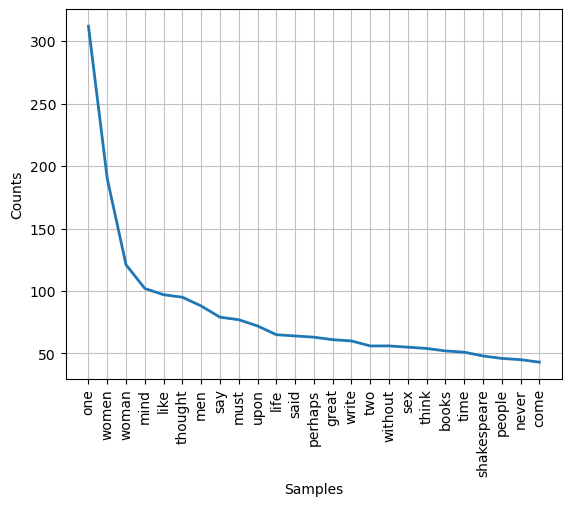

<Figure size 640x480 with 0 Axes>

In [180]:
# Visualization 1
fdist.plot(25, cumulative=False)
plt.savefig('word_freuquency.pdf')
plt.show()

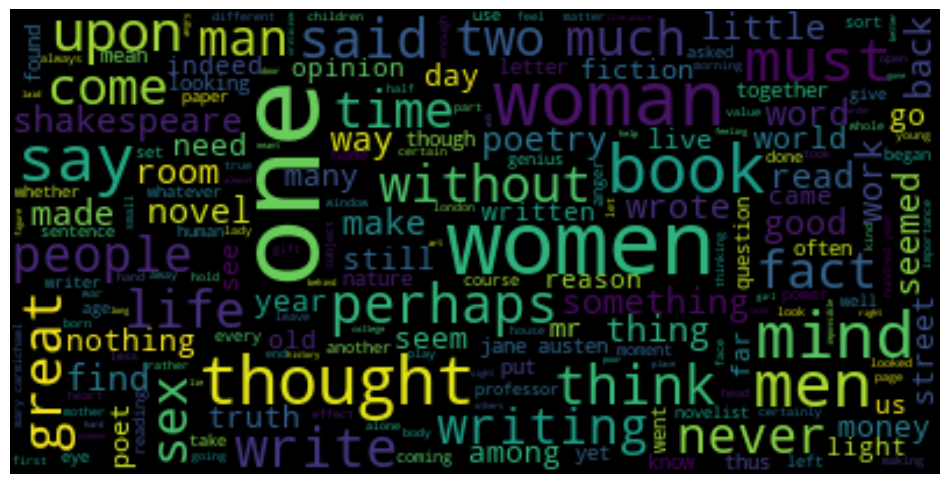

In [181]:
# Visualization 2
from wordcloud import WordCloud

# The individual tokens in the tokens_woolf list are joined into a single string separated by spaces
# This is necessary for the word cloud generation, as it operates on a continuous text string
cleaned = ' '.join(tokens_woolf)
Wordcloud = WordCloud().generate(cleaned)

# lower max_font_size
wordcloud = WordCloud(max_font_size=50).generate(cleaned)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('wordcloud_final.pdf')
plt.show()

### 3. How many letters are in "A Room of One´s Own"?

In [182]:
total_letters = sum(len(tokens_woolf) for token in tokens_woolf)

print("Total number of letters in the tokenized corpus:", total_letters)

Total number of letters in the tokenized corpus: 296046436


### ACHTUNG 4. What is the average word length in Virginia Woolf´s essay? #####

In [183]:
# --> buchstaben anzahl durch wörter teilen
print(total_letters)
print(fdist_tokens_woolf.N())

print(f"One word in Virgina Woolf´s 'A Room of One´s Own' is on average {round(296046436/17206, 2)} letters long.")

296046436
17206
One word in Virgina Woolf´s 'A Room of One´s Own' is on average 17206.0 letters long.


In [184]:
# Calculate the total number of letters and the total number of words
total_letters = sum(len(tokens_woolf) for token in tokens if token.isalpha())
total_words = sum(1 for token in tokens_woolf if token.isalpha())

# Calculate the average word length
average_word_length = total_letters / total_words if total_words > 0 else 0

print("Average word length in the text corpus:", average_word_length)


Average word length in the text corpus: 37655.0


In [185]:
total = float(sum(fdist.values()))
print(total)

17206.0


### 5. How big is Woolf´s Vocabulary? (Unique Words)

In [186]:
# Create a set to store the unique words in the corpus
unique_words = set(tokens_woolf)

# Count the number of unique words
num_unique_words = len(unique_words)

print("Number of unique words in the tokenized corpus:", num_unique_words)

Number of unique words in the tokenized corpus: 5331


### 6. Which words/sequences occur most frequently in consecutive combinations? #####

In [191]:
# Set n=2 for bigrams
n = 2

# Generate bigrams
bigrams = ngrams(tokens_woolf, n)

# Using Counter to count the occurrences of each bigram
bigram_counter = Counter(bigrams)

# Displaying the most common bigrams in decreasing order
for bigram, count in bigram_counter.most_common(20):
    print(" ".join(bigram), count)

jane austen 27
mary carmichael 18
women fiction 13
state mind 12
five hundred 12
hundred years 11
one must 10
nineteenth century 10
george eliot 9
thought looking 9
hundred year 9
one say 8
heart like 8
men women 8
mrs seton 8
mr oscar 8
oscar browning 8
pride prejudice 8
charlotte brontė 8
let us 7


These results can be especially interesting when placing it into the context of time in which this book was written and published (1929). Jane Austen was an english novelist living from 1775-1817. Mary Carmichael was a composer. It is interesting to see that she is referencing other women authors and writers a lot. She is also referencing the famous book Pride and Prejudice by Austen.
Seeing "Five hundred" in fifth place comes as no surprise. The most famous quote in this essay is that a woman "must have money and a room of her own" - 500 pounds a year to be precise.

In [192]:
# Set n=3 for trigrams
n = 3

# Generate bigrams
trigrams = ngrams(tokens_woolf, n)

# Using Counter to count the occurrences of each bigram
trigram_counter = Counter(trigrams)

# Displaying the most common bigrams in decreasing order
for trigram, count in trigram_counter.most_common(20):
    print(" ".join(trigram), count)

mr oscar browning 8
five hundred year 8
two hundred years 5
luncheon parties war 4
heart like singing 4
like singing bird 4
singing bird whose 4
bird whose nest 4
whose nest water 4
nest water shoot 4
mental moral physical 4
moral physical inferiority 4
five hundred pounds 4
fallen splendid tear 3
splendid tear gate 3
coming dove dear 3
water shoot heart 3
shoot heart like 3
heart like apple 3
like apple tree 3


In a next step it would be interesting to analyse why she is referencing mr. Oscar Browning - a british historian - eight times. 
Also seeing "moral physical inferiority" is a reference to her interpretation of how women are seen in a male and patriarchal society. 

### Plotting the most frequent words - das zu NLP analyse evtl. 

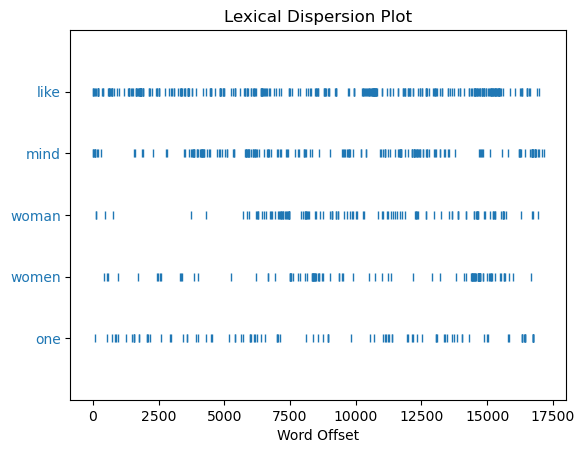

In [282]:
# Lexical Dispersion of the most frequently used words throughout the tokenized text
# Create an NLTK Text object
text = nltk.Text(tokens_woolf)

# Specify the words you want to plot
words_to_plot = ['one', 'women', 'woman', 'mind', 'like']
# which words would be more interesting to look at?

# Create a lexical dispersion plot for the specified words
text.dispersion_plot(words_to_plot)

## Emotion Analysis
Performing sentiment analysis on a literary work like "A Room of One's Own" by Virginia Woolf can be challenging, because traditional sentiment analysis models may not capture the nuances and complexities of literary texts. Instead of sentiment analysis, I used a more nuanced approach. With Emotion Analysis, I wanted to better uderstand the mood changes and overall sentiment of the text. 

# NRC Emotion Lexicon
The NRC Emotion Lexicon is a list of English words and their associations with eight basic emotions (anger, fear, anticipation, trust, surprise, sadness, joy, and disgust) and two sentiments (negative and positive).
You can find more information here: https://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm

In [240]:
# installing
!pip install NRCLex

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [227]:
from nrclex import NRCLex

In [242]:
# Read the NRC Emotion Lexicon File for the english language
nrc_lexicon = {}
with open('/Users/sophiehamann/Downloads/NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', 'r') as file:
    for line in file:
        word, emotion, association = line.strip().split('\t')
        if word not in nrc_lexicon:
            nrc_lexicon[word] = {}
        nrc_lexicon[word][emotion] = int(association)

In [233]:
emotion_counts = {emotion: 0 for emotion in list(nrc_lexicon.values())[0].keys()}
for word in lemmatized_tokens:
    if word in nrc_lexicon:
        for emotion in nrc_lexicon[word]:
            emotion_counts[emotion] += nrc_lexicon[word][emotion]

In [234]:
print(emotion_counts)

{'anger': 633, 'anticipation': 990, 'disgust': 391, 'fear': 639, 'joy': 841, 'negative': 1318, 'positive': 2149, 'sadness': 655, 'surprise': 425, 'trust': 1261}


Whilst the Sentiment "positive" appears the most, the least analysed emotion in the text is disgust. 
In a possible Master´s Thesis, it would be interesting to compare these emotion scores with other works written by Woolf or even other female authors of the time!

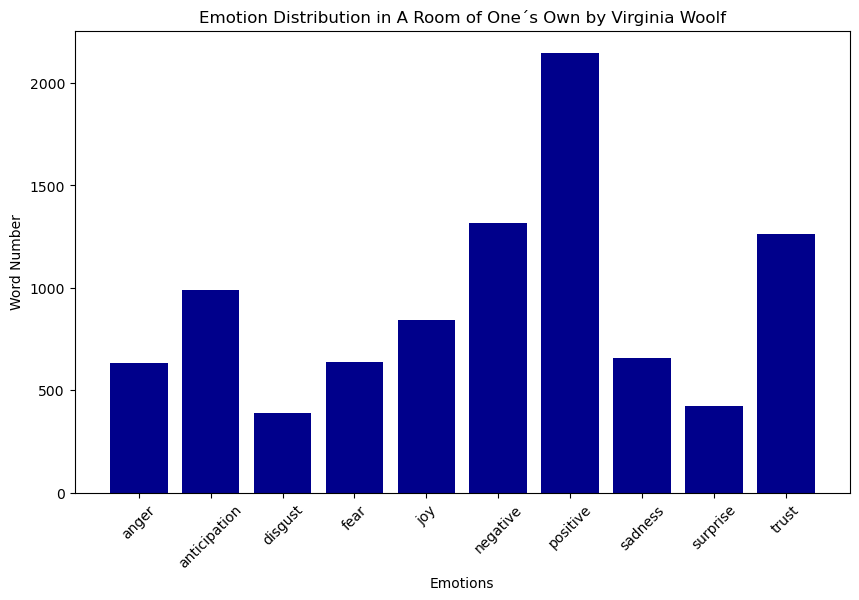

In [252]:
# Here, we work with the tokenized words, not the tokenized sentences!

# my data
emotion_counts = {
    'anger': 633, 'anticipation': 990, 'disgust': 391,
    'fear': 639, 'joy': 841, 'negative': 1318,
    'positive': 2149, 'sadness': 655, 'surprise': 425, 'trust': 1261
}

# Preparing data for plotting
emotions = list(emotion_counts.keys())
counts = list(emotion_counts.values())

# Creating the bar graph
plt.figure(figsize=(10, 6))  # Adjust the size of the graph as needed
plt.bar(emotions, counts, color='darkblue')  # You can choose a different color

# Adding labels and title
plt.xlabel('Emotions')
plt.ylabel('Word Number')
plt.title('Emotion Distribution in A Room of One´s Own by Virginia Woolf')
plt.xticks(rotation=45)  # Rotates the X-axis labels for better readability

# Displaying the graph
plt.savefig('Emotion_Distribution.pdf')
plt.show()

In [279]:
# sentence emotion analysis
from nltk.tokenize import sent_tokenize, word_tokenize

# Step 1: Tokenizing the Text into Sentences
# Here, I have decided to work with the raw, untokenized text file, because I am 
# tokenizing the file into sentences. 
# It is important to calculate the emotions in each sentence with all of the words still present.

sentences = sent_tokenize(text_woolf.lower())  # Convert text to lowercase for consistency

# Step 2: Analyzing Each Sentence for Emotion
sentence_emotions = []
for sentence in sentences:
    tokenized_sentence = word_tokenize(sentence)
    emotion_counts = {emotion: 0 for emotion in list(nrc_lexicon.values())[0].keys()}
    for word in tokenized_sentence:
        if word in nrc_lexicon:
            for emotion in nrc_lexicon[word]:
                emotion_counts[emotion] += nrc_lexicon[word][emotion]
    sentence_emotions.append(emotion_counts)
    
# Step 3: Storing and Aggregating Results (only showing the first 10 sentences)
for i, counts in enumerate(sentence_emotions[:10]):
    print(f"Sentence {i+1}: {counts}")

Sentence 1: {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'negative': 0, 'positive': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}
Sentence 2: {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'negative': 0, 'positive': 1, 'sadness': 0, 'surprise': 0, 'trust': 1}
Sentence 3: {'anger': 1, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'negative': 1, 'positive': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}
Sentence 4: {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'negative': 0, 'positive': 2, 'sadness': 0, 'surprise': 0, 'trust': 1}
Sentence 5: {'anger': 1, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'negative': 1, 'positive': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}
Sentence 6: {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'negative': 0, 'positive': 1, 'sadness': 0, 'surprise': 0, 'trust': 1}
Sentence 7: {'anger': 1, 'anticipation': 0, 'disgust': 0, 'fear': 1, 'joy': 0, 'negative': 3, 'posit

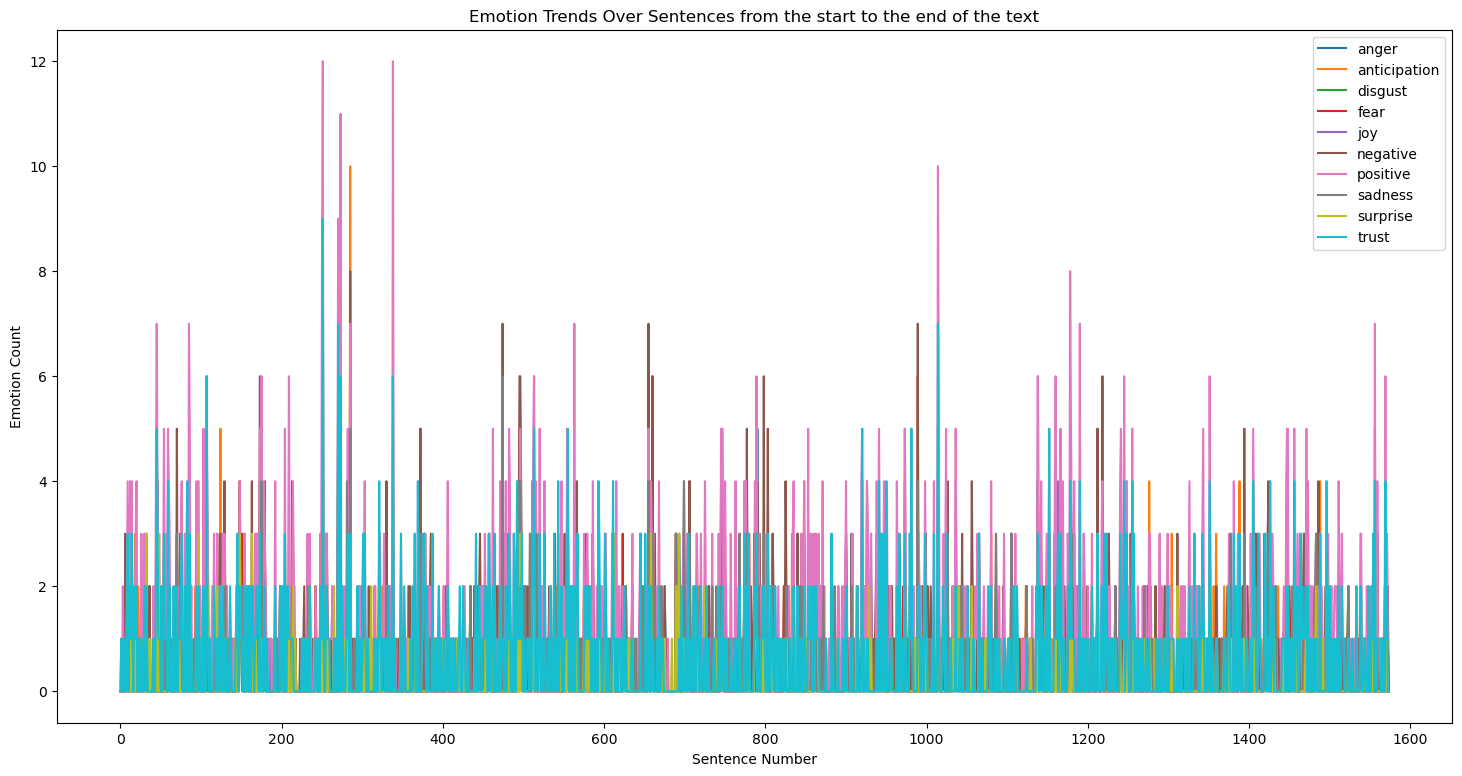

In [275]:
import matplotlib.pyplot as plt

# Preparing data for plotting
emotion_series = {emotion: [] for emotion in sentence_emotions[0].keys()}
for emotions in sentence_emotions:
    for emotion, count in emotions.items():
        emotion_series[emotion].append(count)

# Plotting
plt.figure(figsize=(18, 9))
for emotion, counts in emotion_series.items():
    plt.plot(counts, label=emotion)
plt.xlabel('Sentence Number')
plt.ylabel('Emotion Count')
plt.title('Emotion Trends Over Sentences from the start to the end of the text')
plt.legend()
plt.savefig('Emotion_Sentence_Distribution.pdf')
plt.show()

Interpretation: 
This graph displays through the course of the essay which sentences convey which emotions and sentiments. 
It it interesting to see that "positive" is prevalent between the 200th and 400th sentence as well as the 1000th. 
There is also "negative" sentiment seen in the first half of the essay. 
In a next step, one could analyse the prevalent topics inside of the essay and compare them with this emotion sentence analysis to understand why some emotions or sentiments are common in certain paragraphs of the essay.  
For this, however, it is important to work very closely with the text and read the essay again to really understand what Woolf´s statement and feelings are to certain chapters in the book. 
For example, the third chapter talks about female suicide in a patriarchal society. Here, it is obvious why there is more negative sentiment happening in the second quarter. 
A possible next research step would be to compare Woolf´s entire Bibliography to analyse if the develpoment of her work mirrors her mental state until her own suicide in 1941.